### Desafio Picpay
#### Time de Data Science Crédito

$** Descrição **$ <br>
Criar um modelo<br>
Você esta recebendo um arquivo *.csv, anonimizado, que contém toda a base que você precisa para resolver o problema.
OBS: O "Y-Target" chama-se "Fraude" e o resto são os dados para se resolver o problema.
    
$** Análise $ $ Descritiva **$ <br>
O que você entendeu? <br>
Descreva os padrões que você achar. Valores faltantes? DataSet Desbalanceado? colunas mais importantes? Esteja à vontade para explorar tudo!

$** Documente$ $o$ $que$ $você$ $fez **$ <br>
Esperamos um arquivo, preferencialmente "Notebooks" (Jupyter, Zeppelin, DataBriks, etc) usando python, pyspark ou seja lá o que você usar. Mas esperamos principalmente um arquivo *.PDF ou .PPT nos montrando o que você achou ouy descobriu!

$** Tente$ $a$ $melhor$ $Acurácia$ $possível **$ <br>
Mas o foco é endender o problema, não a acurácia <br>
Seja çá quais forem as métricas que você decidir usar para resolver o problema, o que nos interessa é que chegou até lá!

1. [Obtenção dos dados e Importação das bibliotecas](#t1.)
2. [Qualidade dos dados & Dados faltantes](#t2.)
3. [Explorando os dados](#t3.)
4. [Train Teste](#t4.)
5. [Undersample](#t5.)
6. [Padronização dos Dados](#t6.)
7. [Matriz de Correlação e Gráficos](#t7.)
8. [Removing Outliers](#t8.)
9. [Redução de dimensionalidade](#t9.)
10. [Modelos](#t10.)<br>
11. [Hiperparâmetros](#t11.)
12. [TSNE](#t12.)
13. [Modelo Final](#t13.)

<a id="t1."></a>
# 1. Obtenção dos dados e Importação das bibliotecas

In [66]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as Pipe_imb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from tqdm import tqdm

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
%matplotlib inline

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
pd.options.display.max_columns = None

In [67]:
# Lendo o csv em um DataFrame
df = pd.read_csv('datasets/desafio_fraude.csv')

#Visualização inicial dos dados
df.head()

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,PP11,PP12,PP13,PP14,PP15,PP16,PP17,PP18,PP19,PP20,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
0,-44299.0,-1.239996,0.985194,-1.005080,0.251323,0.872854,-1.677811,1.451311,-0.478908,-0.009459,-0.521274,0.357440,-1.229859,-1.569260,1.034054,1.142130,1.322059,0.203699,-1.460909,0.185789,0.373803,0.387768,0.286200,0.128686,1.280392,-0.301116,-0.673309,-0.069611,-0.009597,-28.38,0
1,-44300.0,-0.472690,1.869177,-0.277741,1.122846,1.526166,0.262325,0.242333,-0.006108,-1.659659,1.176820,-1.005574,-1.315100,-0.079586,-0.038456,-0.707949,0.076187,0.434745,-0.881611,-0.959726,-0.760158,-0.387745,-0.434629,0.512801,-0.110994,-0.350975,-0.073826,0.035071,-0.080140,-407.00,0
2,-44301.0,0.277314,3.455314,-0.722444,-0.428284,2.512025,-0.540760,0.345111,-0.013655,-0.233508,0.138069,0.340559,-0.600446,-1.070178,1.186472,0.902190,-0.294058,-1.185046,1.943876,-0.220848,-1.672885,-0.630255,-0.388096,0.697177,-0.523084,-0.069830,0.196482,0.052145,-0.166683,-800.00,0
3,-44301.0,-1.061770,-0.105481,-0.226711,-0.929524,-0.100625,-0.300173,0.029912,-0.205934,0.233190,-0.093204,-1.695905,-0.858794,0.487163,-0.721720,-0.768855,0.324972,0.092153,0.512348,0.811503,0.165528,-0.147422,-0.426827,0.070413,0.283090,-0.487739,0.288220,-0.035644,-0.007305,-31.28,0
4,-44302.0,4.622715,2.621667,0.872085,0.374010,1.456021,-1.531875,-0.162837,-1.331547,-0.340639,1.774507,1.130069,-0.529619,0.391045,-0.539129,1.000033,-1.296754,0.275466,-0.248517,-0.355322,0.745197,0.221196,0.804017,1.309062,1.505088,0.260178,-0.861611,-0.130562,1.023781,-522.16,0


In [68]:
df.describe()

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,PP11,PP12,PP13,PP14,PP15,PP16,PP17,PP18,PP19,PP20,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,-84550.214580,0.058999,-0.000790,-0.192183,-0.037416,0.061588,-0.025715,0.026695,-0.004257,0.028148,-0.003959,-0.043682,-0.020970,0.004571,-0.011381,-0.070604,0.003138,0.003396,0.015962,0.008172,-0.010086,0.009957,0.027398,0.007275,-0.002739,-0.035211,-0.001127,-0.000535,-0.001028,-88.602261,0.001580
std,27710.748503,1.894453,1.623712,1.406053,1.397615,1.341265,1.310820,1.194923,1.205874,1.106154,1.075456,0.999520,0.982288,0.997403,0.910886,0.942195,0.862561,0.800719,0.827059,0.818711,0.761695,0.739429,0.707714,0.622620,0.606964,0.506130,0.483787,0.397662,0.307684,247.302373,0.039718
min,-133236.000000,-2.454930,-22.057729,-9.382558,-16.875344,-32.911462,-21.307738,-31.527244,-16.635979,-15.594995,-23.745136,-9.413040,-7.848392,-4.569009,-10.526766,-4.970057,-5.477283,-7.343070,-5.041069,-5.591971,-39.420904,-27.202839,-10.503090,-19.002942,-4.022866,-7.519589,-3.220178,-12.152401,-22.620072,-19656.530000,0.000000
25%,-115169.000000,-1.243456,-0.802149,-1.138473,-0.812624,-0.526469,-0.424574,-0.527260,-0.340863,-0.565387,-0.452162,-0.805146,-0.633144,-0.658722,-0.474467,-0.759628,-0.524712,-0.377775,-0.475236,-0.466502,-0.142191,-0.165038,-0.466423,-0.128298,-0.431560,-0.369398,-0.247606,-0.090965,-0.078861,-77.662500,0.000000
50%,-77502.500000,0.042647,-0.082193,-0.359076,-0.039549,0.124219,0.245177,-0.013129,-0.037083,0.095975,0.096236,0.003535,-0.155677,0.014593,-0.052522,-0.153301,-0.063886,0.066407,0.022840,0.007502,0.052019,0.033794,0.014600,0.020008,-0.049357,-0.071030,0.057265,-0.004792,-0.016759,-22.040000,0.000000
75%,-61713.750000,0.952018,0.588600,0.555060,0.816575,0.751890,0.734024,0.564334,0.193112,0.678488,0.515473,0.694170,0.383826,0.657592,0.388889,0.530750,0.469672,0.467568,0.502934,0.477419,0.203971,0.225362,0.540801,0.164620,0.348762,0.274183,0.331361,0.068544,0.048427,-5.410000,0.000000
max,-44299.000000,36.802320,63.344698,33.680984,5.683171,31.356750,21.929312,43.557242,73.216718,13.434066,24.588262,4.797473,18.683715,5.791881,18.392091,4.498945,14.129855,22.667905,9.264609,7.213527,25.222345,34.830382,10.933144,44.807735,2.824849,10.295397,2.604551,22.565679,11.710896,-0.000000,1.000000


In [69]:
print('Número de linhas na base é de {}.'.format(df.shape[0]))

Número de linhas na base é de 150000.


<a id="t2."></a>
# 2. Qualidade dos dados & Dados faltantes

In [70]:
#Verficando se existem valores faltantes no df
print(f'A base possui {df.isnull().sum().sum()} dados faltantes')

A base possui 0 dados faltantes


In [71]:
print(f'base de dados possui {df.duplicated().sum()} dados duplicados')

base de dados possui 496 dados duplicados


In [72]:
## Removendo dados duplicados
df.drop_duplicates(inplace = True)

In [73]:
print(f'O Valor médio de cada transação é de R$ {round(df.Sacado.mean(),2)}')

O Valor médio de cada transação é de R$ -88.65


In [74]:
number_of_fraud = len(df[df.Fraude == 1])
number_of_normal= len(df[df.Fraude == 0])

print ("Fraude:", number_of_fraud)
print ("Normal:",number_of_normal)

Fraude: 219
Normal: 149285


0    0.998535
1    0.001465
Name: Fraude, dtype: float64


Text(0, 0.5, 'Contagem')

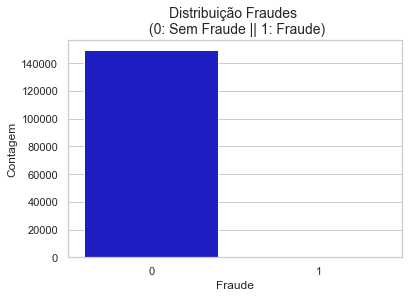

In [75]:
#Verficando desbalanceamento dos dados ("target")
colors = ["#0101DF", "#DF0101"]
print(df['Fraude'].value_counts(1))
sns.countplot(x = 'Fraude', data=df, palette=colors)
plt.title('Distribuição Fraudes \n (0: Sem Fraude || 1: Fraude)', fontsize=14)
plt.ylabel('Contagem')

<font color=gray> **Note:**  <br>
<ul>
<li>O valor da transação é relativamente pequeno. A média de todas as observações feitas é de aproximadamente 88,65 reais </li>

<li> Não há valores "nulos", portanto, não precisamos trabalhar em maneiras de substituir os valores;</li>
    
<li>Existiam 496 duplicadas e foram excluidas da base;</li>

<li>A maioria das transações eram não fraudulentas (99,85%) do tempo, enquanto as transações fraudulentas ocorrem (0,15%) do tempo no dataframe.</li>
    
<li>A Target "Fraude" está desbalanceada e será tratada para evitar "overfitting" </li>  
    
</ul>
    


<a id="t3."></a>
# 3. Explorando os dados

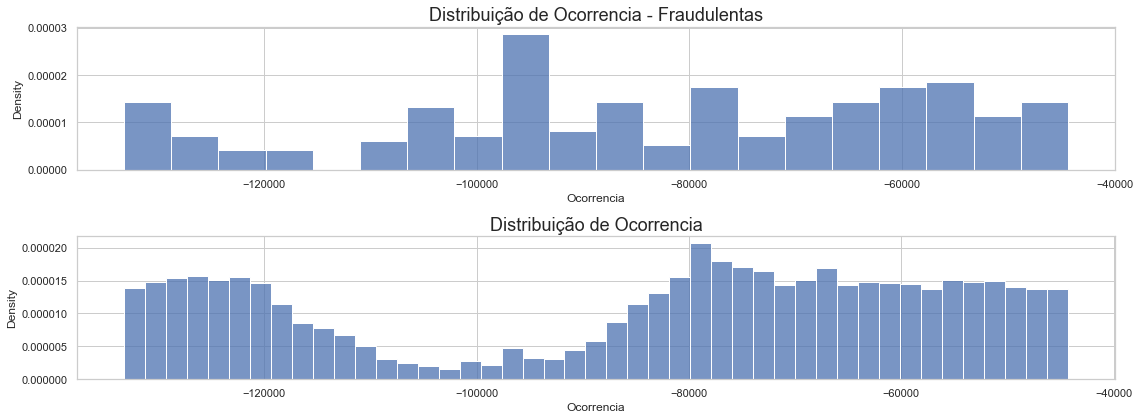

In [76]:
f = plt.figure(figsize=(16, 6))
gs = f.add_gridspec(2, 1)

ax = f.add_subplot(gs[0, 0])
sns.histplot(df['Ocorrencia'][df['Fraude'] == 1], stat  = "density" , bins = 20)
ax.set_title('Distribuição de Ocorrencia - Fraudulentas', fontsize=18)
#ax.set_xlim(-500,80)

ax = f.add_subplot(gs[1, 0])
sns.histplot(df['Ocorrencia'], stat  = "density")
ax.set_title('Distribuição de Ocorrencia', fontsize=18)

plt.tight_layout()

plt.show()

Parece que as transações fraudulentas são distribuídas de maneira mais uniforme, enquanto as transações normais têm uma distribuição cíclica. 

<font color=gray> **Note:**  <br>
<ul>
<li>Para realizar a análise exploratória dos dados estou assumindo que todos os dados PP já se encontram padronizados, portando falta padronizar as colunas "Ocorrrencia" e "Sacado";
</li>
<li>Irei padronizar os dados com Standard Scaler, para aplicar o PCA é melhor trabalharmos com média = 0;
</li>
<li>
Nossos dados de treino serão um dataframe com uma proporção de 50/50 de transações fraudulentas.
</ul>


<a id="t4."> </a>

# 4. Train Teste

<font color=gray> **Note:**  <br>
<ul>
<li>A Iremos utilizar stratify para separar proporcionalmente a mesma proporção de dados fraudulentos na etapa de treino e teste
</li>
</ul>

In [77]:
def train_test(df = df, target = 'Fraude'):
    X,y = df.drop('Fraude', axis = 1), df['Fraude']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify = y)
    return X_train, X_test, y_train, y_test 

In [78]:
X_train, X_test, y_train, y_test = train_test()

<a id="t5."></a>
# 5.UnderSample

<font color=gray> **Note:**  <br>
<ul>
<li>Como nossos dados estão muito desbalanceados iremos utilizar a técnica de undersampling, pois os modelos irão trabalhar melhor com dados balanceados
</li>
</ul>

In [79]:
under_sample = RandomUnderSampler(random_state=42)
#under_sample= RandomUnderSampler()
X_res, y_res = under_sample.fit_resample(X_train, y_train)

In [80]:
df_new = pd.concat([X_res , y_res], axis = 1)
df_new.head()

,Ocorrencia,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,PP11,PP12,PP13,PP14,PP15,PP16,PP17,PP18,PP19,PP20,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,Sacado,Fraude
0,-133023.0,-2.308016,1.360347,1.022050,1.665783,1.164876,0.574616,1.143032,0.110289,1.387002,-1.772883,-0.261256,0.499460,0.150825,0.112172,0.839763,0.299949,-0.164131,-0.527546,-0.310672,0.482965,0.156156,-0.050788,-0.186264,0.438319,0.159523,0.153084,-0.003496,0.068712,-2.71,0
1,-68671.0,-0.943496,0.135740,-0.375054,-1.376077,0.522178,0.585344,-0.138580,0.049762,-0.116221,-0.000228,0.093968,0.227282,1.134746,-0.624465,-1.301431,0.171040,0.007901,0.464975,0.985962,0.020603,-0.176660,-0.275973,0.128150,-0.379271,-0.476804,0.279560,-0.006079,-0.039620,-119.88,0
2,-129784.0,0.643219,-1.170018,-0.110997,0.985536,-1.049877,0.863457,-1.782691,0.367351,1.111900,0.577352,-0.625826,-0.081997,0.662633,-0.971016,0.218294,0.574500,0.417350,-0.320792,-1.033258,0.043549,-0.193980,-0.498309,0.701209,0.277178,-1.158878,-0.435053,0.175608,-0.005681,-39.99,0
3,-48627.0,-0.956072,1.036835,-0.618468,0.130479,1.242237,0.041596,0.634372,-0.083028,1.019833,-0.792160,-1.518006,-0.737288,-0.418924,-0.192666,-0.621130,1.226338,0.123593,-1.381803,1.331917,0.193163,0.001113,-0.171076,0.117549,-0.269094,-0.151324,-0.643476,0.016838,-0.035748,-162.35,0
4,-70306.0,0.698234,-0.467289,-1.399359,-1.018958,-0.054228,-0.700647,-0.812008,-0.304635,0.482231,0.324632,-0.469995,0.216295,1.894459,-0.552244,0.394966,0.706781,-0.264453,-0.145237,-0.889509,-0.134636,-0.061104,-0.076737,0.022359,0.342947,-0.192415,0.228345,-0.082669,-0.096110,-116.69,0


Text(0.5, 1.0, 'Dados balanceados')

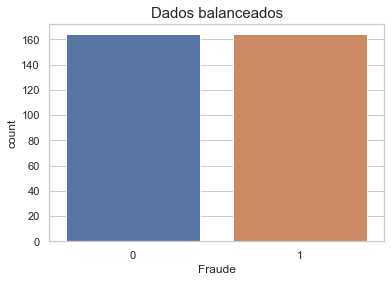

In [81]:
sns.countplot(x='Fraude', data = df_new)
plt.title('Dados balanceados',fontdict = {'fontsize': 15})

<a id="t6."></a>
# 6.Padronização dos Dados

In [82]:
s_scaler = StandardScaler()

In [83]:
df_new['scaled_ocorrencia'] = s_scaler.fit_transform(df_new['Ocorrencia'].values.reshape(-1,1))
df_new['scaled_Sacado'] = s_scaler.fit_transform(df_new['Sacado'].values.reshape(-1,1))

In [84]:
X_test['scaled_ocorrencia'] = s_scaler.fit_transform(X_test['Ocorrencia'].values.reshape(-1,1))
X_test['scaled_Sacado'] = s_scaler.fit_transform(X_test['Sacado'].values.reshape(-1,1))

In [85]:
df_new.drop(['Ocorrencia' , 'Sacado'], axis = 1, inplace = True)
X_test.drop(['Ocorrencia' , 'Sacado'], axis = 1, inplace = True)


In [86]:
X_test

,PP1,PP2,PP3,PP4,PP5,PP6,PP7,PP8,PP9,PP10,PP11,PP12,PP13,PP14,PP15,PP16,PP17,PP18,PP19,PP20,PP21,PP22,PP23,PP24,PP25,PP26,PP27,PP28,scaled_ocorrencia,scaled_Sacado
70255,-1.286158,0.545304,-0.402505,0.547274,1.082987,1.003069,0.308528,0.304421,1.009873,-0.619411,0.292156,-0.426946,-1.402199,0.115687,-0.860166,1.220299,0.133223,-0.736007,0.784507,0.292853,0.442692,0.885336,-0.082664,-0.436725,-0.111793,-0.894527,0.058456,-0.023126,0.317705,0.112281
111156,0.754968,0.017484,-0.347452,1.213067,-0.833333,-0.062691,-0.103841,-0.096137,-1.180638,0.511852,1.895788,-0.054391,-0.498321,0.556598,0.103611,-0.393181,1.062562,-0.402055,0.394416,0.250536,-0.205520,-1.077991,-0.348936,0.048324,0.897962,0.103028,-0.344209,-0.291547,-1.057442,0.375915
85002,-1.109681,0.277842,-0.207765,-0.638483,0.242262,-0.216232,0.156693,-0.075121,-0.398603,0.076312,-0.184238,-0.920426,-0.060991,0.039456,1.038464,-0.077446,0.462050,-0.207648,-0.765932,-0.055103,0.049497,0.076163,0.263755,0.430607,-0.642997,-0.464855,0.033143,-0.004165,0.126510,0.062716
123878,-2.055202,-0.112872,1.704528,-0.434977,-0.368631,0.902517,-0.181484,0.227015,-0.527987,0.375168,0.580540,-0.026804,0.185986,0.791424,-0.230974,-0.319649,-0.499661,0.286274,-0.039400,0.154505,0.359872,0.963560,-0.338875,-0.561801,0.274082,-0.169502,0.065960,0.029087,-1.336506,0.334297
145402,1.038660,-0.398659,-0.809336,-2.682383,-2.613789,1.152001,-1.110043,0.328378,1.680635,-0.839684,1.611455,0.705453,0.534572,-0.163302,2.064887,-0.406008,0.902475,0.655209,1.910540,-0.026032,-0.109304,-0.151196,0.098686,0.059035,-0.008272,0.166564,0.110193,0.039297,-1.673645,0.363353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19321,0.728260,-0.578475,-1.555566,1.424587,-0.036555,0.581717,-0.529745,-0.121198,0.249932,0.571600,-0.908850,-0.517171,0.058542,-0.139209,0.160064,-0.897245,1.044004,-0.272543,0.276142,-0.127171,0.031587,0.145897,0.054144,-0.027357,0.316437,-0.721647,-0.242378,-0.164332,1.124455,0.267470
3877,0.815231,-0.297442,-0.918173,-1.092831,-1.323344,-0.593669,-0.471480,0.033487,-0.191439,-0.298984,1.887189,0.747513,0.635237,0.161404,-0.484208,0.848492,-0.050401,0.179066,-1.288473,-0.097634,0.205095,0.050754,0.414196,1.316876,-0.023373,0.168004,-0.226082,0.072239,1.382984,0.159709
78658,-1.210690,0.250153,-1.016501,-0.760186,0.940300,0.047529,0.695606,-0.156812,-1.108917,0.212549,1.339812,0.228914,0.819977,0.246669,-0.340204,-0.352586,0.300522,-0.043310,-0.152645,0.140636,0.133805,0.240221,0.021444,0.104770,-0.287460,-0.350832,-0.009617,-0.020559,0.208435,0.331050
71820,1.319518,-2.475629,0.938261,-1.117900,0.180129,0.399893,1.112068,1.867971,0.978782,1.464908,0.803832,-0.067471,-0.073573,0.501300,-1.070169,-0.814998,-1.377850,-1.089639,-0.090901,-0.573006,1.199027,-0.448922,-0.125133,0.310381,0.053055,0.303761,0.076414,-0.046433,0.297097,0.375915


<a id="t7."></a>

# 7.Matriz de Correlação e Gráficos

In [87]:
def matriz_correlacao(data, ax, title, cmap = 'coolwarm_r'):
    corr = data.corr()
    sns.heatmap(corr, cmap=cmap, ax=ax)
    ax1.set_title(title, fontsize=14)

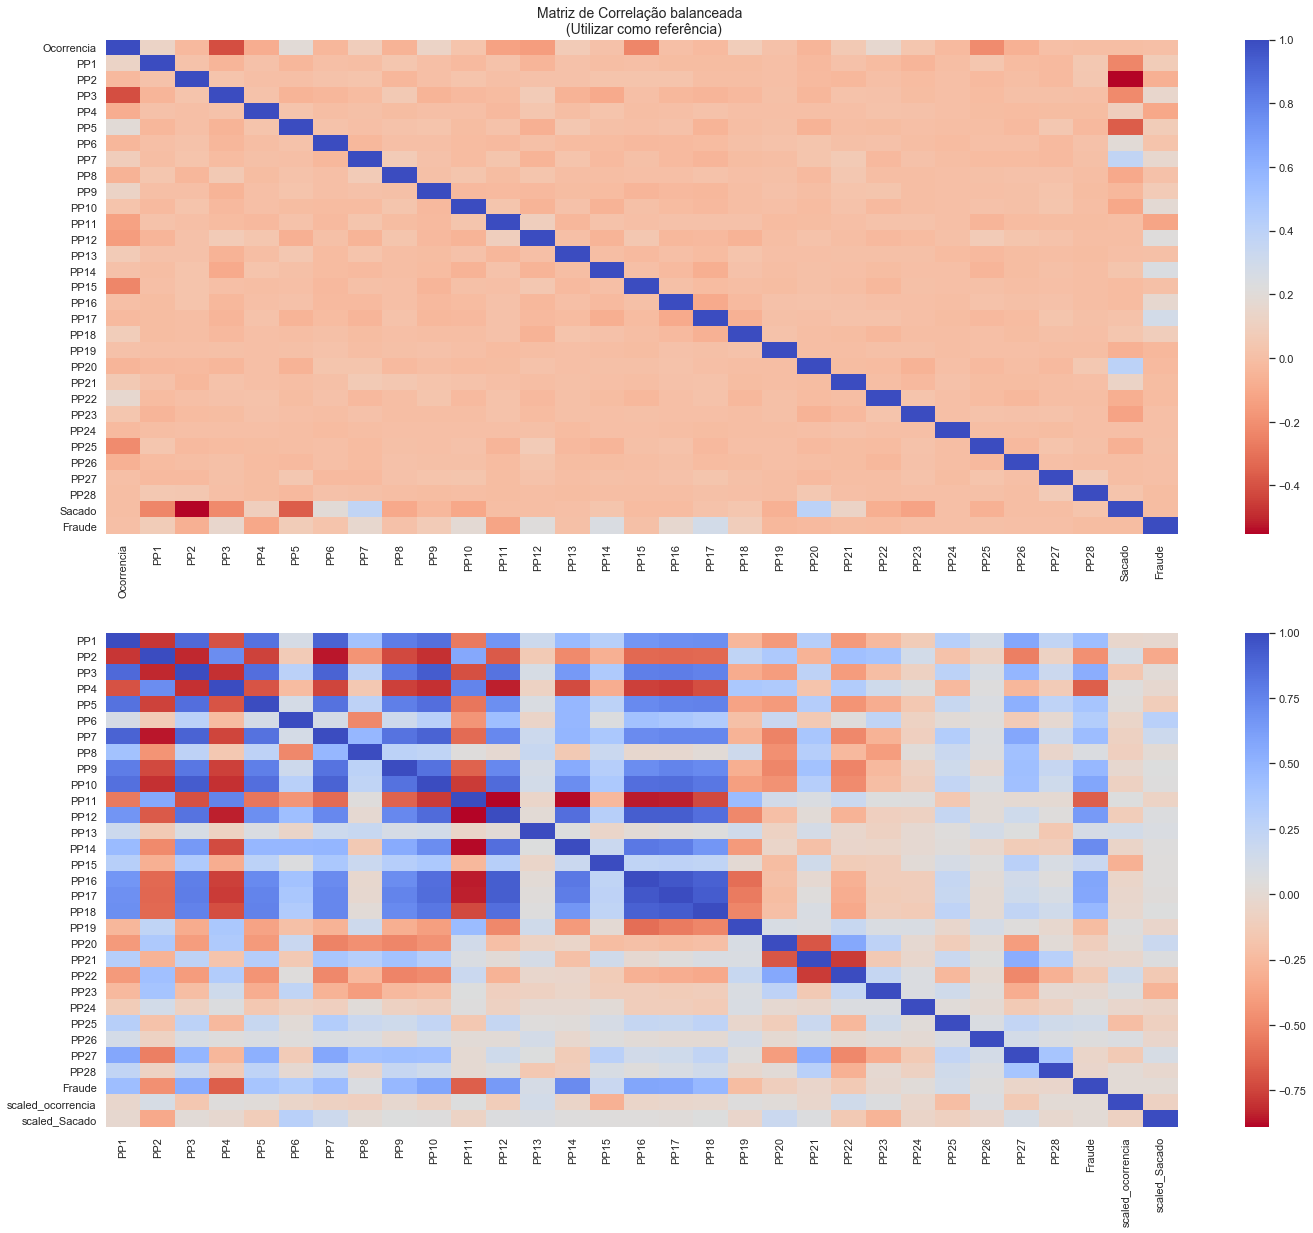

In [88]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

matriz_correlacao(df, ax1, "Matriz de Correlação não balanceada \n (Não utilizar como referência)")
matriz_correlacao(df_new, ax2, "Matriz de Correlação balanceada \n (Utilizar como referência)")

**Note:**<br>
<lu>
    <li> Correlação Negativa: PP2, PP4, PP11, PP19. Quanto mais baixos esses valores, maior a probabilidade de o resultado final ser uma transação fraudulenta.

</li>
    <li> Correlação Positiva: PP1, PP3, PP5, PP6, PP7, PP9, PP10, PP12, PP14, PP16, PP17, PP18. Quanto mais altos esses valores, maior a probabilidade de o resultado final ser uma transação fraudulenta.
</li>
<li>
BoxPlots: Nós vamos utilizar Boxplots e histogramas para entender melhor a distribuição desses itens nas transações fraudulentas ou não fraudulentas 

</li>
</lu>

C:\Users\felip\anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  del sys.path[0]


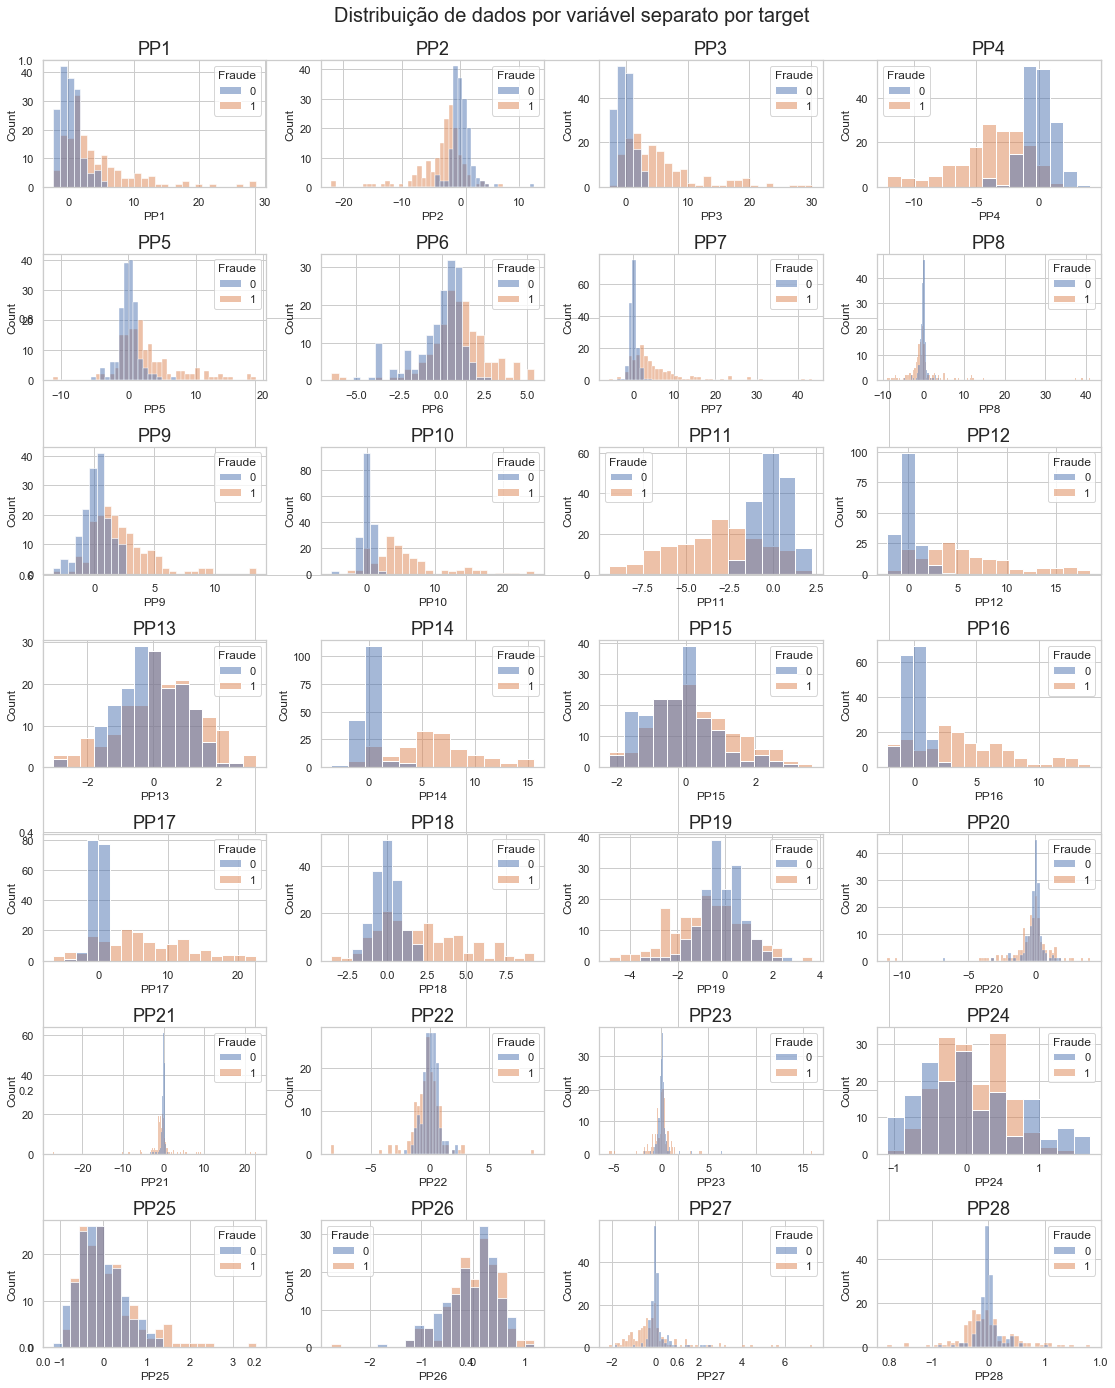

In [89]:
f = plt.figure(figsize=(16, 20), constrained_layout=True)

gs = f.add_gridspec(7, 4)
count = 1
plt.title('Distribuição de dados por variável separato por target', fontdict = {'fontsize': 20, 'verticalalignment': 'bottom'}, pad=35)
for i in range (7):
    for j in range (4):
        ax = f.add_subplot(gs[i, j])
        ax.set_title(f'PP{count}', fontsize=18)
        sns.histplot(x = f'PP{count}' , data = df_new, hue = 'Fraude')

        count += 1
plt.tight_layout()
plt.show()

<font color=gray> **Note:**  <br>
<ul>
<li> Não é possivel identificar fraudes olhando apenas para uma variável, porém algumas variáveis aparentam explicar uma parte dos dados de forma satisfatória. 
As Variáveis PP3, PP4,PP7, PP10, PP11, PP12, PP14, PP16, PPP17, PP18 
</li>

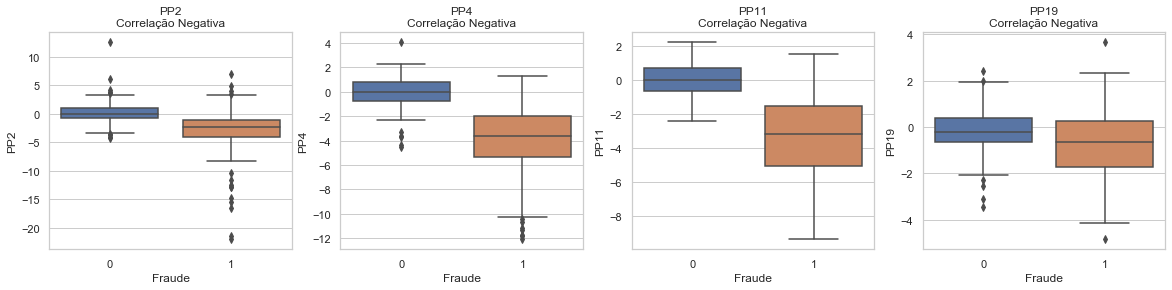

In [90]:
negative_corr = ['PP2', 'PP4', 'PP11', 'PP19']
item = 0
f, axes = plt.subplots(ncols=4, figsize=(20,4))

for column in negative_corr:
    sns.boxplot(x ='Fraude' ,y= column, data = df_new, ax = axes[item])
    axes[item].set_title(f'{negative_corr[item]}\nCorrelação Negativa')
    item += 1

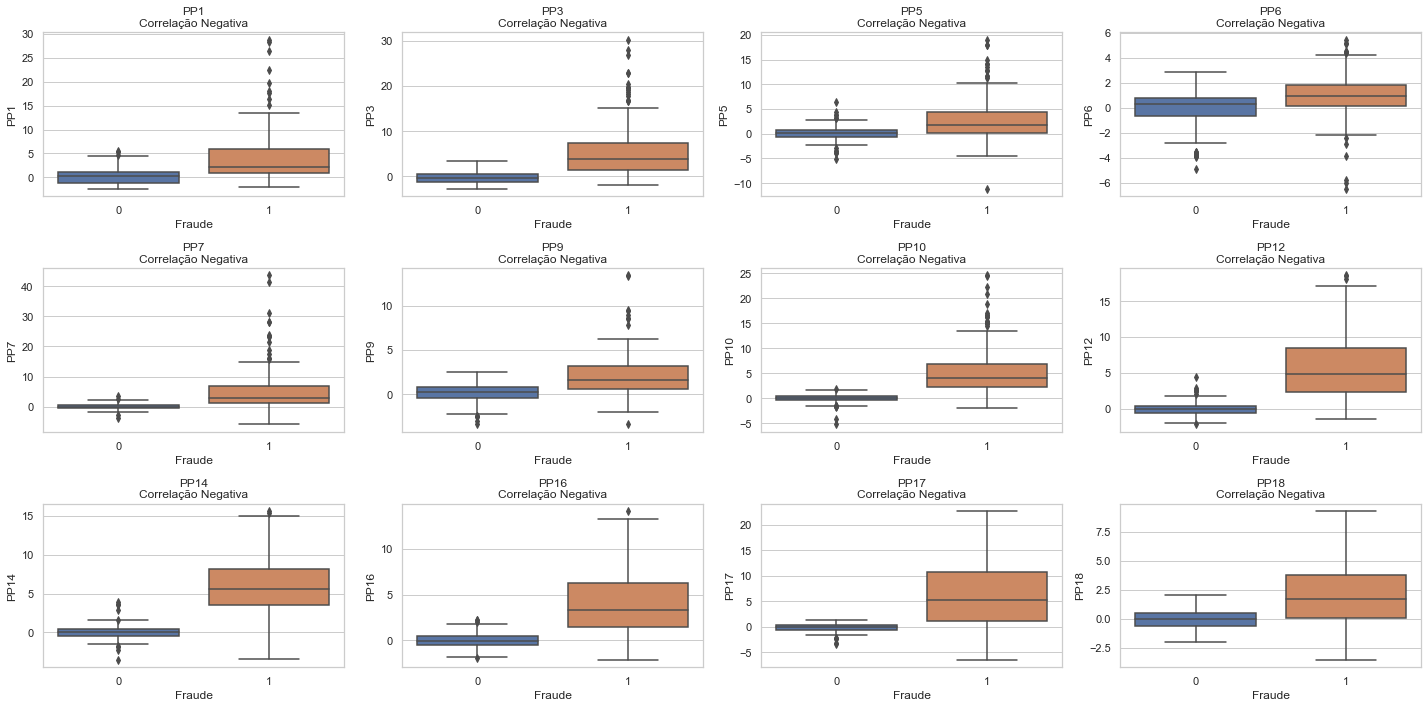

In [91]:
positive_corr = ['PP1', 'PP3', 'PP5', 'PP6', 'PP7', 'PP9', 'PP10', 'PP12', 'PP14', 'PP16', 'PP17', 'PP18']
item = 0
linha = 0
nome = 0
f, axes = plt.subplots(ncols=4, nrows = 3, figsize=(20,10))

for column in positive_corr:
    sns.boxplot(x ='Fraude' ,y= column, data = df_new,ax = axes[linha, item])
    axes[linha, item].set_title(f'{positive_corr[nome]}\nCorrelação Negativa')
    item += 1
    nome+= 1
    if item > 3:
        item = 0
        linha += 1
        
plt.tight_layout()
plt.show()

<a id ="t8."> </a>
# 8. Removing Outliers da Target

 **Note:**
<lu>
    <li> Iremos remover os outliers dos dados fraudulentos para melhorar a precisão do modelo
</li>
</lu>

In [92]:
df_new.shape

(328, 31)

In [93]:
def removing_outliers_fraude(data, feature, target ):
    #mascara booleana para target positiva
    print(feature)
    fraude = data[feature].loc[data[target] == 1].values
    #selecionando os quantiles
    q25, q75 = np.percentile(fraude, 25), np.percentile(fraude, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    fraude_iqr = q75 - q25
    print('iqr: {}'.format(fraude_iqr))
    fraude_cut_off = fraude_iqr * 1.5
    #definindo limites
    lim_lower, lim_upper = q25 - fraude_cut_off, q75 + fraude_cut_off
    #printando os outliers
    outliers =[x for x in fraude if x > lim_upper or x < lim_lower]
    print('Outliers da feature {}: {}'.format(feature, len(outliers)))
    print('outliers:{}'.format(outliers))
    print('----' * 20)
    #definindo novo dataframe
    df = data.drop(data[(data[feature] > lim_upper) & (data[target] == 1) | (data[feature] < lim_lower) & (data[target] == 1)].index)
    return df
    

In [94]:
### removing outlieres from negative_corr

for coluna in negative_corr:
    df_new = removing_outliers_fraude(df_new, coluna, 'Fraude' )
    
### removing outlieres from positive_corr
    
for coluna in positive_corr:
    df_new = removing_outliers_fraude(df_new, coluna, 'Fraude' )

PP2
Quartile 25: -4.076778254809968 | Quartile 75: -1.0864341657936276
iqr: 2.9903440890163404
Outliers da feature PP2: 14
outliers:[-22.0577289904909, -16.497471901867, -21.4672029942752, -14.7063346696674, -11.614800542586696, -12.572117853538499, -15.53613332478, 4.8144607395562105, 6.976420007546411, -10.4325276778611, 3.93073139597263, -12.785970638297998, -12.864988563015, 3.4204679837707]
--------------------------------------------------------------------------------
PP4
Quartile 25: -5.170880045364333 | Quartile 75: -1.8453779256008451
iqr: 3.325502119763488
Outliers da feature PP4: 3
outliers:[-10.259035976621801, -10.6485054461688, -10.307226307913199]
--------------------------------------------------------------------------------
PP11
Quartile 25: -4.736471617991545 | Quartile 75: -1.38338482637215
iqr: 3.353086791619395
Outliers da feature PP11: 0
outliers:[]
--------------------------------------------------------------------------------
PP19
Quartile 25: -1.735178881410

<a id = "t9."></a>
# 9.Escolhendo modelo de redução de dimensionalidade

 **Note:**
<lu>
    <li> Para verificar qual melhor modelo de redução de dimensionalidade iremos aplicar 3 modelos e verificar por um scatter plot a melhor opção, no caso o TSNE
</li>
</lu>

In [95]:
X, y = df_new.drop(['Fraude'], axis = 1), df_new['Fraude']

In [96]:
# T-SNE Implementation
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

# PCA Implementation
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)

# TruncatedSVD
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)


In [97]:
reduced_tsne = pd.DataFrame(X_reduced_tsne, columns = ['one', 'two'])
reduced_tsne['target'] = y
reduced_pca = pd.DataFrame(X_reduced_pca, columns = ['one', 'two'])
reduced_pca['target'] = y
reduced_svd = pd.DataFrame(X_reduced_svd, columns = ['one', 'two'])
reduced_svd['target'] = y


In [98]:
def scatter(data, ax, title, x = 'one', y='two', palette = 'bright', hue = 'target'):
    sns.scatterplot(x, y, hue, data = data, ax=ax, palette = palette )
    ax.set_title(title, fontdict = {'fontsize' : 20})

C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\felip\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


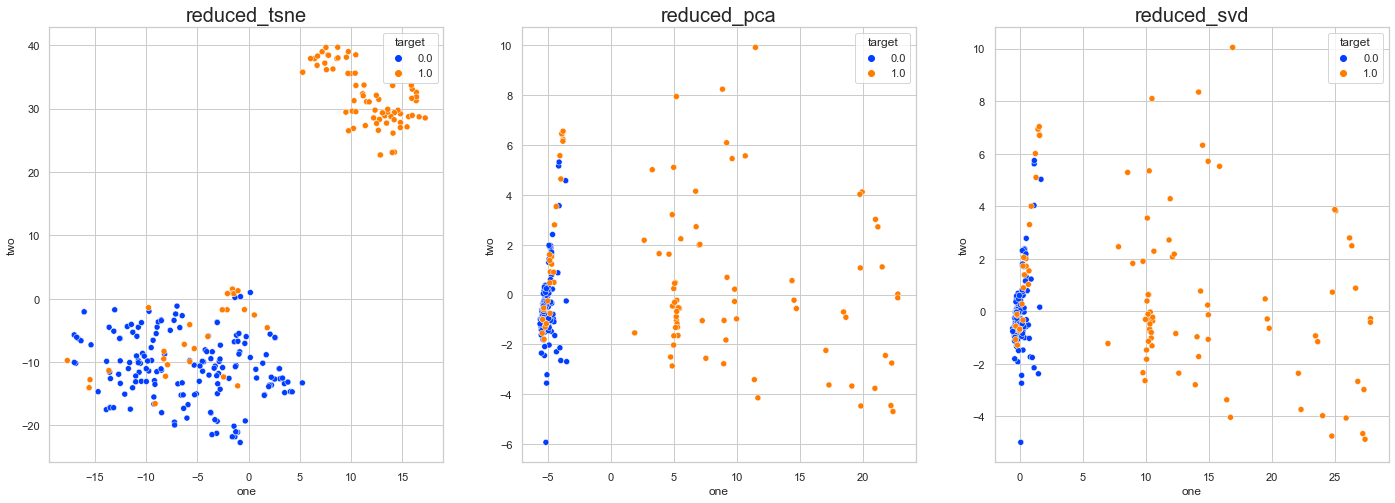

In [99]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,8))

scatter(reduced_tsne, ax1 , 'reduced_tsne')
scatter(reduced_pca, ax2, 'reduced_pca')
scatter(reduced_svd, ax3, 'reduced_svd')

<a id="t10."></a>
# 10. MODELOS

In [100]:
# def confusion_matrix(y_test, y_pred, cmap = 'Greens'):
#     plt.figure(figsize=(3, 3))
#     sns.heatmap(confusion_matrix(y_test, y_pred),annot=True, cmap=cmap, cbar=False)

In [101]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(class_weight = 'balanced'),
    'RandomForestClassifier' : RandomForestClassifier(class_weight = 'balanced'),
    'AdaBoostClassifier'  : AdaBoostClassifier(),
}

In [102]:
for key, classifier in tqdm(classifiers.items()):
    classifier.fit(X, y)
    y_pred = classifier.predict(X_test)
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    training_score = cross_val_score(classifier, X, y, cv=5, scoring = 'precision')
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")
    print('----'*20)

  0%|          | 0/6 [00:00<?, ?it/s]

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     37321
           1       0.02      0.87      0.04        55

    accuracy                           0.94     37376
   macro avg       0.51      0.91      0.51     37376
weighted avg       1.00      0.94      0.97     37376

[[35195  2126]
 [    7    48]]


 17%|█▋        | 1/6 [00:00<00:01,  2.54it/s]

Classifiers:  LogisticRegression Has a training score of 92.0 % accuracy score
--------------------------------------------------------------------------------


 33%|███▎      | 2/6 [00:04<00:05,  1.39s/it]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37321
           1       0.05      0.80      0.10        55

    accuracy                           0.98     37376
   macro avg       0.53      0.89      0.54     37376
weighted avg       1.00      0.98      0.99     37376

[[36517   804]
 [   11    44]]
Classifiers:  KNeighborsClassifier Has a training score of 95.0 % accuracy score
--------------------------------------------------------------------------------


 50%|█████     | 3/6 [00:04<00:03,  1.17s/it]

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37321
           1       0.06      0.78      0.11        55

    accuracy                           0.98     37376
   macro avg       0.53      0.88      0.55     37376
weighted avg       1.00      0.98      0.99     37376

[[36626   695]
 [   12    43]]
Classifiers:  SVC Has a training score of 96.0 % accuracy score
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.88      0.94     37321
           1       0.01      0.85      0.02        55

    accuracy                           0.88     37376
   macro avg       0.51      0.87      0.48     37376
weighted avg       1.00      0.88      0.94     37376

[[32918  4403]
 [    8    47]]
Classifiers: 

 67%|██████▋   | 4/6 [00:05<00:01,  1.08it/s]

 DecisionTreeClassifier Has a training score of 80.0 % accuracy score
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     37321
           1       0.05      0.80      0.10        55

    accuracy                           0.98     37376
   macro avg       0.53      0.89      0.55     37376
weighted avg       1.00      0.98      0.99     37376

[[36548   773]
 [   11    44]]


 83%|████████▎ | 5/6 [00:08<00:01,  1.61s/it]

Classifiers:  RandomForestClassifier Has a training score of 97.0 % accuracy score
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     37321
           1       0.02      0.87      0.03        55

    accuracy                           0.93     37376
   macro avg       0.51      0.90      0.50     37376
weighted avg       1.00      0.93      0.96     37376

[[34537  2784]
 [    7    48]]


100%|██████████| 6/6 [00:10<00:00,  1.80s/it]

Classifiers:  AdaBoostClassifier Has a training score of 89.0 % accuracy score
--------------------------------------------------------------------------------


<a id="t11"></a>
## 11. Tunando HiperParâmetros

In [103]:
#Regressão Logistica
logistic_params={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                }
grid_log_reg = GridSearchCV(LogisticRegression(class_weight = 'balanced'), logistic_params, n_jobs=-1,scoring = 'precision' )
grid_log_reg.fit(X,y)
y_pred = grid_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print(log_reg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37321
           1       0.63      0.71      0.67        55

    accuracy                           1.00     37376
   macro avg       0.81      0.85      0.83     37376
weighted avg       1.00      1.00      1.00     37376

[[37298    23]
 [   16    39]]
LogisticRegression(C=0.001, class_weight='balanced')


In [104]:
#KNeighborsClassifier
KNearest_params = {
    'n_neighbors': [1,3,5,7,9],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
}

grid_kn = GridSearchCV(KNeighborsClassifier(), KNearest_params,scoring = 'precision')
grid_kn.fit(X,y)
y_pred = grid_kn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# KNears best estimator
KNearest = grid_kn.best_estimator_
print(KNearest)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     37321
           1       0.07      0.78      0.14        55

    accuracy                           0.99     37376
   macro avg       0.54      0.88      0.56     37376
weighted avg       1.00      0.99      0.99     37376

[[36783   538]
 [   12    43]]
KNeighborsClassifier(n_neighbors=7)


In [105]:
#SVC
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params,scoring = 'precision')
grid_svc.fit(X,y)
y_pred = grid_svc.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# SVC best estimator
svc = grid_svc.best_estimator_
print(svc)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37321
           1       0.46      0.69      0.55        55

    accuracy                           1.00     37376
   macro avg       0.73      0.84      0.78     37376
weighted avg       1.00      1.00      1.00     37376

[[37277    44]
 [   17    38]]
SVC(C=0.5, kernel='poly')


In [106]:
# RandomForestClassifier
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,9,1)), 
              "min_samples_leaf": list(range(2,7,1))}
grid_tree = GridSearchCV(RandomForestClassifier(), forest_params,scoring = 'precision')
grid_tree.fit(X, y)
y_pred = grid_tree.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# tree best estimator
forest_clf = grid_tree.best_estimator_
print(forest_clf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37321
           1       0.22      0.78      0.34        55

    accuracy                           1.00     37376
   macro avg       0.61      0.89      0.67     37376
weighted avg       1.00      1.00      1.00     37376

[[37169   152]
 [   12    43]]
RandomForestClassifier(max_depth=2, min_samples_leaf=2)


In [107]:
log_reg_score = cross_val_score(log_reg, X, y, cv=5,scoring = 'precision' )
print('Logistic Regression score: ', round(log_reg_score.mean(),3) * 100 , '%')

kn_score = cross_val_score(KNearest, X, y, cv=5,scoring = 'precision')
print('KNearest score: ', round(kn_score.mean(),3) * 100 , '%')

svc_score = cross_val_score(svc, X, y, cv=5,scoring = 'precision')
print('SVC score: ', round(svc_score.mean(),3) * 100 , '%')

forest_score = cross_val_score(forest_clf, X, y, cv=5,scoring = 'precision')
print('Random Forest: ', round(forest_score.mean(),2) * 100 , '%')

Logistic Regression score:  100.0 %
KNearest score:  97.5 %
SVC score:  100.0 %
Random Forest:  98.0 %


<a id="t12."></a>
# 12.Utilizando TSNE
Modelo Utilizando TSNE não ficou bom, iremos realizar utilizando o PCA
Modelo utilizando PCA:
    Recall  0.71  / precision : 0.67

In [108]:
X_reduced_tsne_train = TSNE(n_components=2, random_state=42).fit_transform(X.values)

In [109]:
X_reduced_tsne_test = TSNE(n_components=2, random_state=42).fit_transform(X_test.values)

In [110]:
x = pd.DataFrame(X_reduced_tsne_train)
x_test = pd.DataFrame(X_reduced_tsne_test)

In [111]:
#Regressão Logistica
logistic_params={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
                }
grid_log_reg = GridSearchCV(LogisticRegression(class_weight = 'balanced'), logistic_params, n_jobs=-1,scoring = 'precision' )
grid_log_reg.fit(x,y)
y_pred = grid_log_reg.predict(x_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print(log_reg)

              precision    recall  f1-score   support

           0       1.00      0.51      0.67     37321
           1       0.00      0.84      0.00        55

    accuracy                           0.51     37376
   macro avg       0.50      0.67      0.34     37376
weighted avg       1.00      0.51      0.67     37376

[[18930 18391]
 [    9    46]]
LogisticRegression(C=0.001, class_weight='balanced')


<a id="t13."></a>

# 13. Modelo Final

In [144]:
logistic_params={
    'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
                 'C': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
                }
grid_log_reg = GridSearchCV(LogisticRegression(class_weight = 'balanced'), logistic_params, n_jobs=-1,scoring = 'precision' )
grid_log_reg.fit(X,y)
y_pred = grid_log_reg.predict(X_test)
print(classification_report(y_test, y_pred))
# logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
print(log_reg)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37321
           1       0.86      0.67      0.76        55

    accuracy                           1.00     37376
   macro avg       0.93      0.84      0.88     37376
weighted avg       1.00      1.00      1.00     37376

LogisticRegression(C=1e-05, class_weight='balanced')


Text(0.5, 1, 'Confusion Matrix')

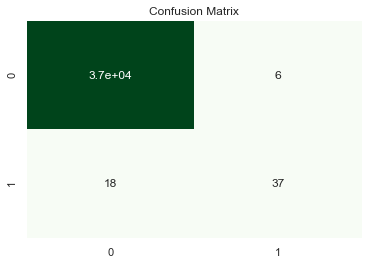

In [145]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = 'Greens', cbar = False)
plt.title('Confusion Matrix')